In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [2]:
train_df = pd.read_csv('../ML_project_files/train.csv')
test_df = pd.read_csv('../ML_project_files/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


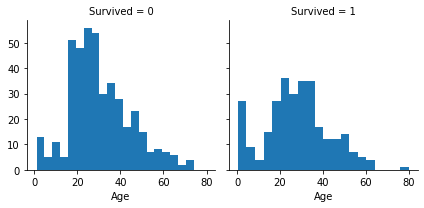

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


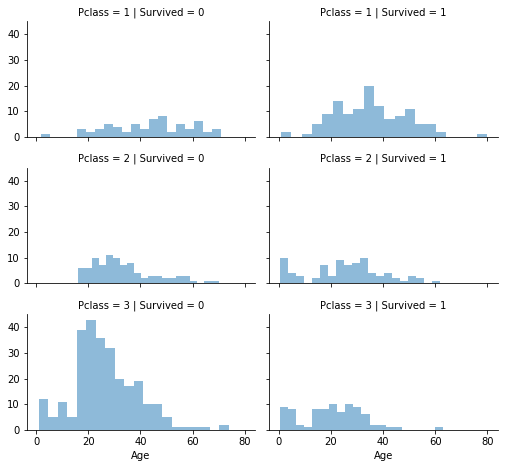

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


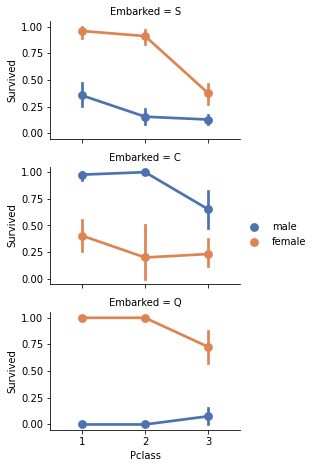

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


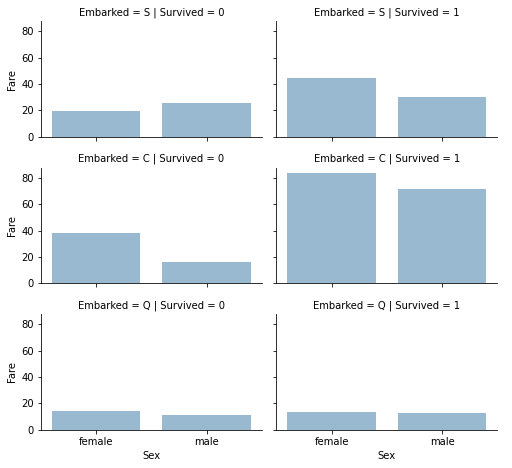

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\rashm\miniconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


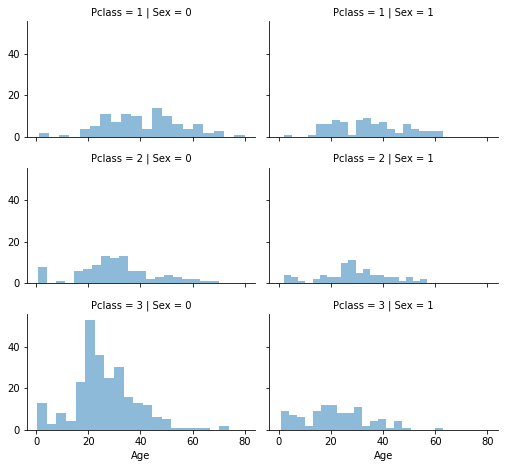

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [40]:
from sklearn.model_selection import train_test_split
features = train_df.drop("Survived", axis=1)
targeted_feature = train_df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(features,targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression using accuracy_score is 79.85
The cross validated score for Logistic REgression is: 80.36
the accuracy of logistic regression using logreg_score 80.58
The classification report of logreg:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

The confusion_matrix
 [[477  72]
 [103 239]]


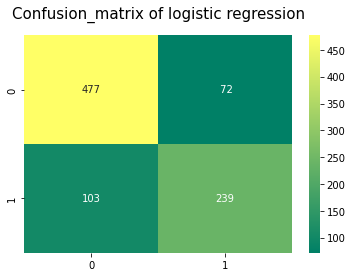

In [41]:
################# logistic regression #################
logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train,y_train)
prediction_lr=logreg.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression using accuracy_score is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(logreg,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
acc_log = round(logreg.score(features, targeted_feature) * 100, 2)
print('the accuracy of logistic regression using logreg_score',acc_log)
y_pred = cross_val_predict(logreg,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of logistic regression', y=1.05, size=15)
print('The classification report of logreg:\n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion_matrix\n',cm)

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.055335
5,Title,0.453116
4,Embarked,0.315623
2,Age,0.305016
6,IsAlone,0.058521
3,Fare,-0.169235
7,Age*Class,-0.309678
0,Pclass,-0.722868


--------------The Accuracy of the model----------------------------
The accuracy of the support vector machines with linear kernel using accuracy score is 79.1
The cross validated score for support vector machines with linear kernel is: 78.67
The accuracy of svm with linear kernel using svm score is: 78.68
The classification report of svm with linear kernel is: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

The confusion matrix of svm: 
 [[468  81]
 [109 233]]


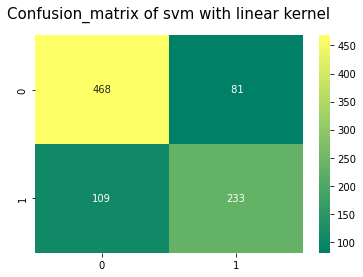

In [43]:
#################support vector machines############
svm = SVC(C=1, kernel='linear')
svm.fit(X_train,y_train)
prediction_svm=svm.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the support vector machines with linear kernel using accuracy score is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(svm,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for support vector machines with linear kernel is:',round(result_svm.mean()*100,2))
acc_svmlinear = round(svm.score(features, targeted_feature) * 100, 2)
print('The accuracy of svm with linear kernel using svm score is:',acc_svmlinear)
y_pred = cross_val_predict(svm,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of svm with linear kernel', y=1.05, size=15)
print('The classification report of svm with linear kernel is: \n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion matrix of svm: \n',cm)

In [44]:
svm.get_params()
svm.coef_
svm.intercept_
svm.dual_coef_
svm.support_vectors_



array([[3., 0., 0., ..., 4., 0., 0.],
       [3., 1., 1., ..., 3., 0., 3.],
       [3., 1., 1., ..., 2., 1., 3.],
       ...,
       [2., 1., 3., ..., 2., 1., 6.],
       [3., 1., 1., ..., 2., 0., 3.],
       [3., 1., 1., ..., 2., 1., 3.]])

--------------The Accuracy of the model----------------------------
The accuracy of the support vector machines rbf kernel using accuracy score is 79.1
The cross validated score for support vector machines using rbf kernel is: 78.23
The accuracy of svm using rbf kernel with svm score is: 78.45
The classification report of svm with rbf kernel is: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       549
           1       0.70      0.75      0.73       342

    accuracy                           0.78       891
   macro avg       0.77      0.78      0.77       891
weighted avg       0.79      0.78      0.78       891

The confusion matrix of svm with rbf kernel: 
 [[439 110]
 [ 84 258]]


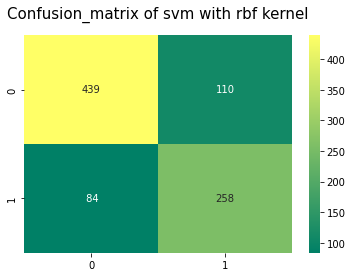

In [45]:
#################support vector machines with rbf kernel############
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the support vector machines rbf kernel using accuracy score is',round(accuracy_score(prediction_svc,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_svc=cross_val_score(svc,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for support vector machines using rbf kernel is:',round(result_svc.mean()*100,2))
acc_svcrbf = round(svc.score(features, targeted_feature) * 100, 2)
print('The accuracy of svm using rbf kernel with svm score is:',acc_svcrbf)
y_pred = cross_val_predict(svc,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of svm with rbf kernel', y=1.05, size=15)
print('The classification report of svm with rbf kernel is: \n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion matrix of svm with rbf kernel: \n',cm)

--------------The Accuracy of the model----------------------------
The accuracy of knn Classifier using accuracy score is 79.1
The cross validated score for knn Classifier is: 79.13
The accuracy of knn using the knn.score:  85.3
The classification report of knn: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       549
           1       0.77      0.65      0.71       342

    accuracy                           0.79       891
   macro avg       0.79      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891

The confusion matrix of knn:
 [[481  68]
 [118 224]]


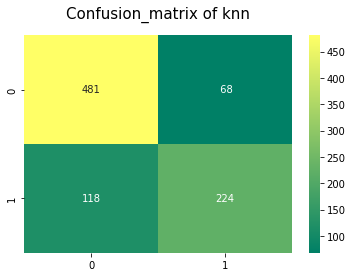

In [46]:
######## Knn classifier############
knn = KNeighborsClassifier(weights = 'distance',n_neighbors = 7)
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of knn Classifier using accuracy score is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(knn,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for knn Classifier is:',round(result_knn.mean()*100,2))
acc_knn = round(knn.score(features, targeted_feature) * 100, 2)
print('The accuracy of knn using the knn.score: ',acc_knn)
y_pred = cross_val_predict(knn,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of knn', y=1.05, size=15)
print('The classification report of knn: \n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion matrix of knn:\n',cm)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTreeClassifier using accuracy score is 79.85
The cross validated score for DecisionTreeClassifier is: 79.69
The accuracy of decision tree using the dtree.score:  85.52
The classification report of decision tree: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       549
           1       0.78      0.66      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.80       891

The confusion matrix of decision tree:
 [[487  62]
 [117 225]]


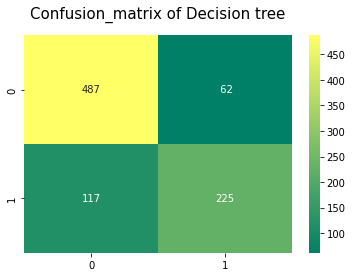

In [47]:
######## decision tree############
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2)
dtree.fit(X_train,y_train)
prediction_decisiontree=dtree.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTreeClassifier using accuracy score is',round(accuracy_score(prediction_decisiontree,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_decisiontree=cross_val_score(dtree,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for DecisionTreeClassifier is:',round(result_decisiontree.mean()*100,2))
acc_dtree = round(dtree.score(features, targeted_feature) * 100, 2)
print('The accuracy of decision tree using the dtree.score: ',acc_dtree)
y_pred = cross_val_predict(dtree,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of Decision tree', y=1.05, size=15)
print('The classification report of decision tree: \n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion matrix of decision tree:\n',cm)

In [48]:
dtree.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

--------------The Accuracy of the model----------------------------
The accuracy of the random_forest Classifier using accuracy score is 79.85
The cross validated score for random_forestClassifier is: 80.59
The accuracy of random_forest using the random_forest.score:  85.52
The classification report of random_forest: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.69      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.81      0.80       891

The confusion matrix of random_forest:
 [[482  67]
 [106 236]]


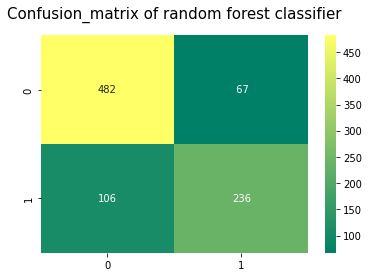

In [49]:
######## Random forest classifier############
random_forest = RandomForestClassifier(criterion='gini', random_state = 0,max_depth=20, min_samples_split=2,n_estimators = 50)
random_forest.fit(X_train,y_train)
prediction_random_forest=random_forest.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the random_forest Classifier using accuracy score is',round(accuracy_score(prediction_random_forest,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle = True,random_state=22) # k=10, split the data into 10 equal parts
result_random_forest=cross_val_score(random_forest,features,targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for random_forestClassifier is:',round(result_random_forest.mean()*100,2))
acc_random_forest = round(random_forest.score(features, targeted_feature) * 100, 2)
print('The accuracy of random_forest using the random_forest.score: ',acc_random_forest)
y_pred = cross_val_predict(random_forest,features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix of random forest classifier', y=1.05, size=15)
print('The classification report of random_forest: \n',classification_report(targeted_feature,y_pred))
cm = confusion_matrix(targeted_feature,y_pred)
print('The confusion matrix of random_forest:\n',cm)

In [50]:
random_forest.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines with linear kernel','support Vector Machines with rbf kernel' ,'Logistic Regression', 'knn','Decision Tree','Random Forest Classifier'],
    'Score': [acc_svmlinear,acc_svcrbf , acc_log,acc_knn, acc_dtree,acc_random_forest]})
models.sort_values(by='Score', ascending=False)


,Model,Score
4,Decision Tree,85.52
5,Random Forest Classifier,85.52
3,knn,85.30
2,Logistic Regression,80.58
0,Support Vector Machines with linear kernel,78.68
1,support Vector Machines with rbf kernel,78.45
